In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/2022/Divvy_Trips_2022_full.csv.gz', compression='gzip')

## Общая информация о датасете

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


## Распределение поездок casual vs member

In [5]:
counts = df['member_casual'].value_counts()

In [6]:
counts

member_casual
member    3345685
casual    2322032
Name: count, dtype: int64

Text(0.5, 1.0, 'Распределение пользователей по категориям member/casual')

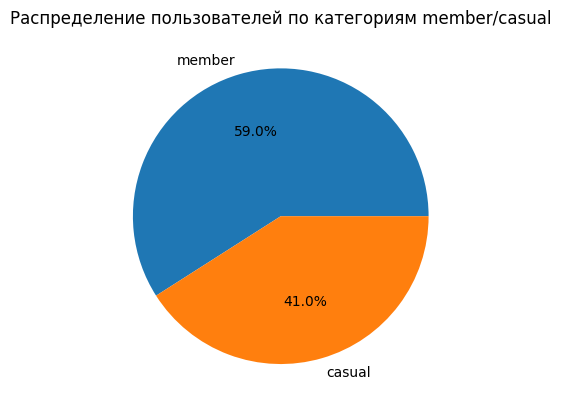

In [7]:
plt.pie(counts, autopct='%1.1f%%', labels=counts.index)
plt.title('Распределение пользователей по категориям member/casual')

## Распределение поездок по месяцам

In [8]:
# Получаем колонку с датой
df['month'] = pd.to_datetime(df['started_at']).dt.month

In [9]:
month_results = df['month'].value_counts()

Text(0, 0.5, 'Количество поездок')

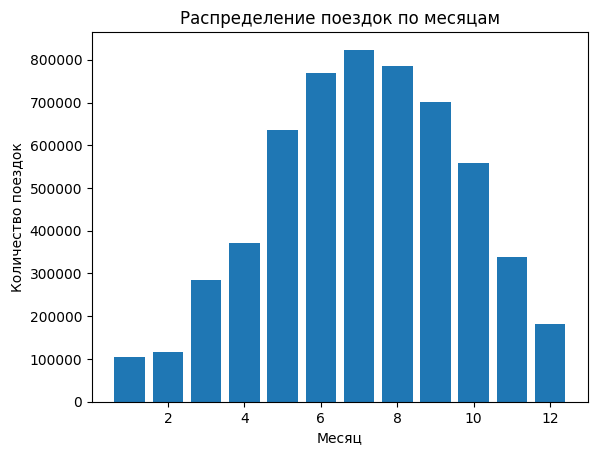

In [10]:
plt.bar(month_results.index, month_results.values)
plt.title('Распределение поездок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество поездок')

## Распределение поездок по времени суток

In [11]:
# Получаем колонку с временем
df['time'] = pd.to_datetime(df['started_at']).dt.hour

In [12]:
# Разделяем на категории
time_categories = pd.cut(df["time"], bins=[0, 6, 12, 18, 24], labels=["Ночь", "Утро", "День", "Вечер"])

In [13]:
# Делим на миллион, чтобы получить читаемое число
count_by_time = time_categories.value_counts().div(1000000)

In [14]:
count_by_time = count_by_time[['Утро', 'День', 'Вечер', 'Ночь']]

Text(0, 0.5, 'Количество поездок (миллионы)')

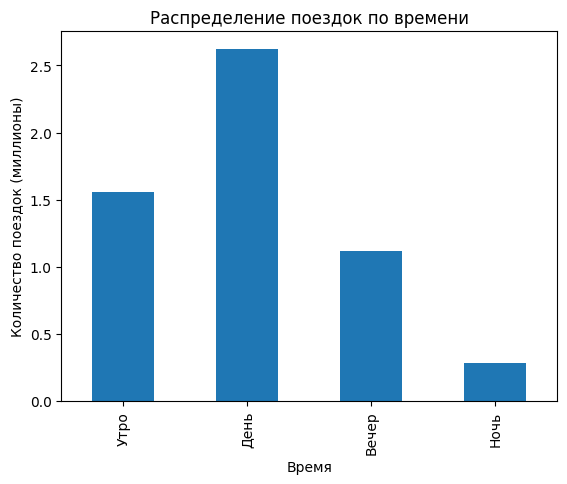

In [15]:
count_by_time.plot(kind="bar")
plt.title("Распределение поездок по времени")
plt.xlabel("Время")
plt.ylabel("Количество поездок (миллионы)")

## Распределение поездок по дням недели

In [16]:
# Получаем колонку с днем недели
df['day'] = pd.to_datetime(df['started_at']).dt.dayofweek

In [17]:
# Делим на тысячу, чтобы получить читаемое число
day_results = df['day'].value_counts().div(1000)

In [18]:
# Переименовываем дни недели
day_results = day_results.rename({0: 'Воскресенье', 1: 'Понедельник', 2: 'Вторник', 3: 'Среда', 4: 'Четверг', 5: 'Пятница', 6: 'Суббота'}, axis='index')

In [19]:
# Переставляем дни недели в нужном порядке
day_results = day_results[['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']]

Text(0, 0.5, 'Количество поездок (тысячи)')

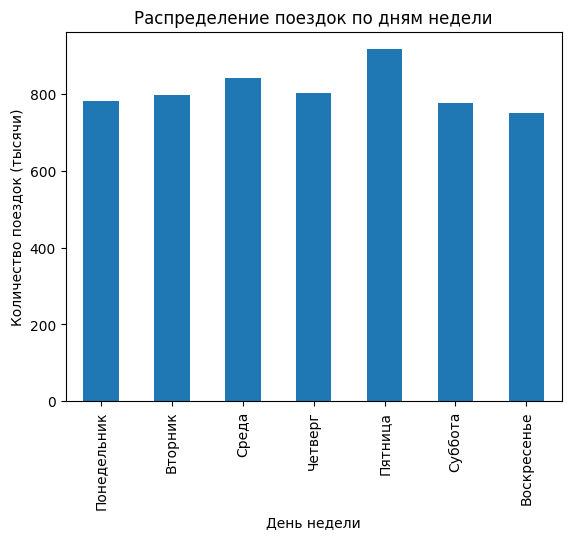

In [20]:
day_results.plot(kind="bar")
plt.title("Распределение поездок по дням недели")
plt.xlabel("День недели")
plt.ylabel("Количество поездок (тысячи)")

## Распределение поездок по типу велосипеда

In [21]:
bikes_count = df['rideable_type'].value_counts().div(1000)

Text(0, 0.5, 'Количество поездок (тысячи)')

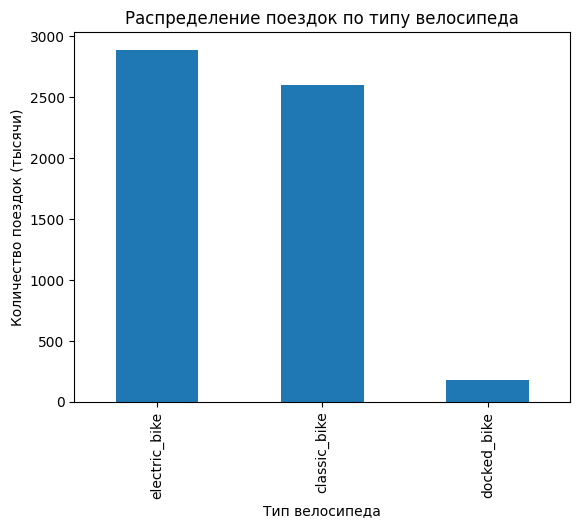

In [22]:
bikes_count.plot(kind="bar")
plt.title("Распределение поездок по типу велосипеда")
plt.xlabel("Тип велосипеда")
plt.ylabel("Количество поездок (тысячи)")